In [1]:
# 推測統計のためのライブラリ、データ準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 積分に関するwarningを出力しないようにする
warnings.filterwarnings('ignore',
                                           category=integrate.IntegrationWarning)

In [3]:
# 1次元の連続型確率変数を考える
# 確率密度関数 or 密度関数と言われる積分を含んだ関数で定義する
# 確率変数Xがx0=< X <= x1の区間に入る確率Pで定義される
# →密度関数に囲まれた領域の面積が確率になる

# いかさまルーレットがとりうる値の区間の下限と上限を定義する
x_range = np.array([0, 1])

In [4]:
# 密度関数を定義する
def f(x):
    if x_range[0] <= x <= x_range[1]:
        # xではなく2xとしているのは確率の総和を1とするため
        return 2 * x
    else:
        return 0

In [5]:
X = [x_range, f]

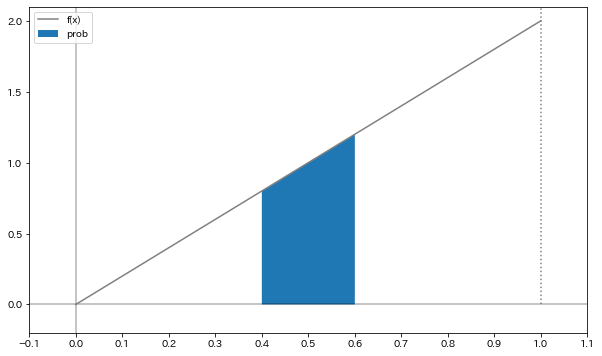

In [7]:
# 密度関数f(x)を図示する
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4から0.6のx座標を用意
xs = np.linspace(0.4, 0.6, 100)
# xsの範囲でf(x)とx軸に囲まれたを塗りつぶす
ax.fill_between(xs, [f(x) for x in xs], label='prob')
ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [9]:
# 台形の面積を積分を用いて求める
# 第1引数が被積分関数、第2引数と第3引数が積分区間
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [10]:
# 確率の性質
# →確率は0以上である
# を満たしているかチェック
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 関数の最小値はfunというインスタンス変数に
res.fun

0

In [11]:
# 確率の性質
# →確率の総和は1である
# を満たしているかチェック

# -∞から+∞までの積分
integrate.quad(f, -np.inf, np.inf)[0]

1.000